In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt

## Building the Model Class

In [2]:
# Create a Model class that inherits nn.Module
# Object Oriented Programming (OOP), not Functional Programming
class Model(nn.Module):
    # Input Layer (4 Feature of the Iris flower) -->
    # Hidden Layer 1 (8 neurons) -->
    # Hidden Layer 2 (9 neurons) -->
    # Output Layer (3 classes of Iris flower).
    def __init__ (self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()  # instantiate our nn.Module
        
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.out(X)

        return X

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(42)

# Create an instance of model
model = Model()

## Loading Iris Dataset from Gist

In [4]:
# Loading the dataset as a data frame
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [5]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [6]:
# Mapping each variety to a unique integer
my_df['variety'] = my_df['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})

my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
# Train Test Split -> determine X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [8]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int64

In [10]:
# Convert to numpy representations
X = X.values
y = y.values

In [11]:
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

## Split Train and Test Sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Train Test Split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Convert X feature to fload tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [15]:
# Convert y lables to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## Define Criterion and Optimizer

In [16]:
# Set the criterion of model to measure the error.
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [17]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

## Training the Model

In [18]:
# Train our neural network
# Epochs (One run thru all the training data in our network)
epochs = 500
losses = []

for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train)  # get predicted results

    # Measure the loss / error, gonna be high at first
    loss = criterion(y_pred, y_train) # predicted values vs the y_train

    # Keep track of our losses, loss is a tensor
    losses.append(loss.detach().numpy())

    # print stats every 10 epoch
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

    # Do some back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.0846974849700928
Epoch: 10 and loss: 0.9178672432899475
Epoch: 20 and loss: 0.7620364427566528
Epoch: 30 and loss: 0.6275593042373657
Epoch: 40 and loss: 0.46693316102027893
Epoch: 50 and loss: 0.2876907289028168
Epoch: 60 and loss: 0.16747021675109863
Epoch: 70 and loss: 0.10634326934814453
Epoch: 80 and loss: 0.0805111825466156
Epoch: 90 and loss: 0.06965284794569016
Epoch: 100 and loss: 0.06449069082736969
Epoch: 110 and loss: 0.061621930450201035
Epoch: 120 and loss: 0.059805791825056076
Epoch: 130 and loss: 0.05852556973695755
Epoch: 140 and loss: 0.057549696415662766
Epoch: 150 and loss: 0.056762777268886566
Epoch: 160 and loss: 0.05610174313187599
Epoch: 170 and loss: 0.0555298775434494
Epoch: 180 and loss: 0.05502276122570038
Epoch: 190 and loss: 0.05456468090415001
Epoch: 200 and loss: 0.054144516587257385
Epoch: 210 and loss: 0.053754325956106186
Epoch: 220 and loss: 0.05338846519589424
Epoch: 230 and loss: 0.05304582789540291
Epoch: 240 and loss: 0.05287

## Plot the Training Loss

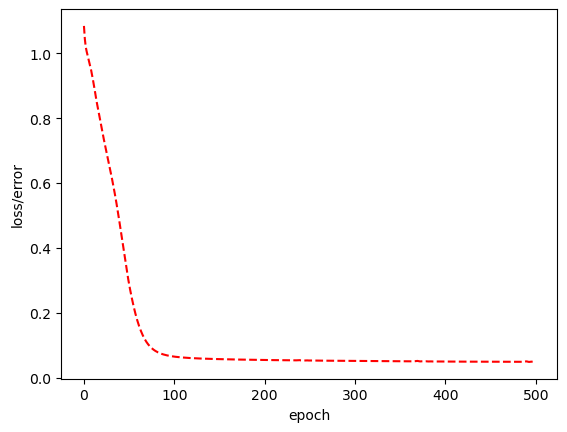

In [19]:
# Graph it out
plt.plot(losses, color='red', linestyle='dashed')
plt.ylabel('loss/error')
plt.xlabel('epoch');

## Predicting with Trained Model and Evaluation on Test Set

In [20]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # basically turn off back propagation
    y_pred = model.forward(X_test)
    loss = criterion(y_pred, y_test)  # compute Cross-entropy loss/error

In [21]:
loss

tensor(0.0240)

In [22]:
num_correct_preds = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model.forward(data)

        # Will tell us what type of flower class our nn thinks it is
        print(f'{i+1}.) {str(y_pred):40} \t predicted label:{y_pred.argmax()}\t true label:{y_test[i]} \t result:{'correct' if y_pred.argmax() == y_test[i] else 'wrong'} ')

        # Predicted correct or not
        if y_pred.argmax().item() == y_test[i]:
            num_correct_preds += 1

print(f'\n{num_correct_preds} flowers are predicted correct out of 30 test flowers.')

1.) tensor([-1.9143, 10.1336,  2.8532])      	 predicted label:1	 true label:1 	 result:correct 
2.) tensor([ 12.1616,   3.8262, -11.0541])   	 predicted label:0	 true label:0 	 result:correct 
3.) tensor([-18.7296,   0.8536,  22.0961])   	 predicted label:2	 true label:2 	 result:correct 
4.) tensor([-2.9166,  9.0264,  4.0074])      	 predicted label:1	 true label:1 	 result:correct 
5.) tensor([-3.1749,  9.9211,  4.3195])      	 predicted label:1	 true label:1 	 result:correct 
6.) tensor([ 11.3071,   3.6489, -10.2455])   	 predicted label:0	 true label:0 	 result:correct 
7.) tensor([ 1.1811,  9.3988, -0.4448])      	 predicted label:1	 true label:1 	 result:correct 
8.) tensor([-9.7831,  5.1433, 11.8921])      	 predicted label:2	 true label:2 	 result:correct 
9.) tensor([-5.1846,  7.4256,  6.5933])      	 predicted label:1	 true label:1 	 result:correct 
10.) tensor([ 0.4916, 10.0704,  0.2304])      	 predicted label:1	 true label:1 	 result:correct 
11.) tensor([-7.6388,  6.4512

### Create new iris flowers for prediction

In [23]:
new_iris = torch.tensor([4.7, 3.2, 1.3, .2])

In [24]:
with torch.no_grad():
    
    print(model.forward(new_iris))
    print(model(new_iris))

tensor([ 11.4404,   2.8236, -10.3955])
tensor([ 11.4404,   2.8236, -10.3955])


In [25]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

with torch.no_grad():
    print(model(newer_iris))
    print(model(newer_iris).argmax().item())

tensor([-7.4278,  6.0419,  9.1547])
2


## Save the ANN Classifier Model

In [26]:
torch.save(model.state_dict(), 'pytorch_nn_iris_classifier.pt')

In [27]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.6032,  0.3151,  0.4249,  1.1511],
                      [-0.1096,  0.1009, -0.2434,  0.2936],
                      [ 0.5777, -0.6265,  1.0459,  1.0734],
                      [ 0.6968,  0.6252, -0.1220, -1.2988],
                      [ 0.5829,  0.5930, -0.7273, -1.0887],
                      [-0.2304, -0.0586, -0.2031,  0.3317],
                      [-0.3947, -0.2305, -0.1412, -0.3006],
                      [ 0.6284, -0.2511,  1.1708,  0.4858]])),
             ('fc1.bias',
              tensor([-0.1330,  0.0832, -1.3409,  1.9024,  1.6684,  0.4040,  0.0547, -0.1934])),
             ('fc2.weight',
              tensor([[ 0.2478, -0.0959,  0.0082,  0.9711,  0.7630, -0.1546,  0.2041,  0.5320],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.2878, -0.0062,  1.0948, -1.3113, -1.0705, -0.2413,  0.1090,  0.3343],
                      [ 0.3099, -0.0737,  0.9375, 

### Load the Saved Model

In [28]:
new_model = Model()

state_dict = torch.load('pytorch_nn_iris_classifier.pt', weights_only=True)
new_model.load_state_dict(state_dict)

<All keys matched successfully>

In [29]:
# Make sure it has loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)